In [2]:
import numpy as np
import matplotlib.pyplot as plt

neff_air = 1.935
neff_am = 2.026 # amorphous
neff_cry = 2.181 

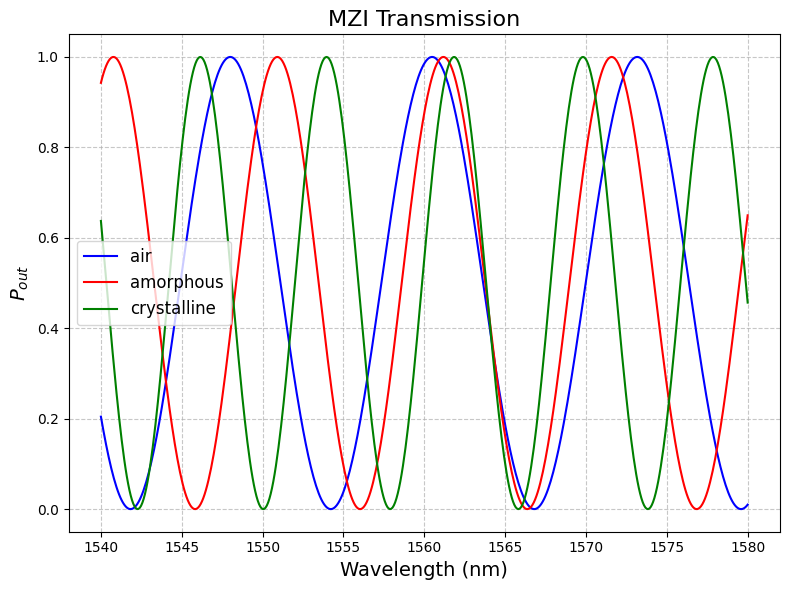

In [3]:
def Pout(Pin, lam, neff):
    len1 = ( 50*3 + 2*(2*np.pi*100)/4 )* 1000
    len2 = ( 50 + 2*(2*np.pi*100)/4 )* 1000
    beta1 = 2*np.pi / lam * neff
    beta2 = 2*np.pi / lam * neff_air
    Pin = Pin
    theta = beta1*len1 - beta2*len2
    Pout = Pin*np.cos(theta/2)**2
    return(Pout)

lam = np.linspace(1540, 1580, 500)

Pout_air = Pout(1, lam, neff_air)
Pout_am = Pout(1, lam, neff_am)
Pout_cry = Pout(1, lam, neff_cry)

plt.figure(figsize=(8, 6))
plt.plot(lam, Pout_air, linestyle='-', color='b', label = 'air')
plt.plot(lam, Pout_am, linestyle='-', color='r', label = 'amorphous')
plt.plot(lam, Pout_cry, linestyle='-', color='g', label = 'crystalline')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



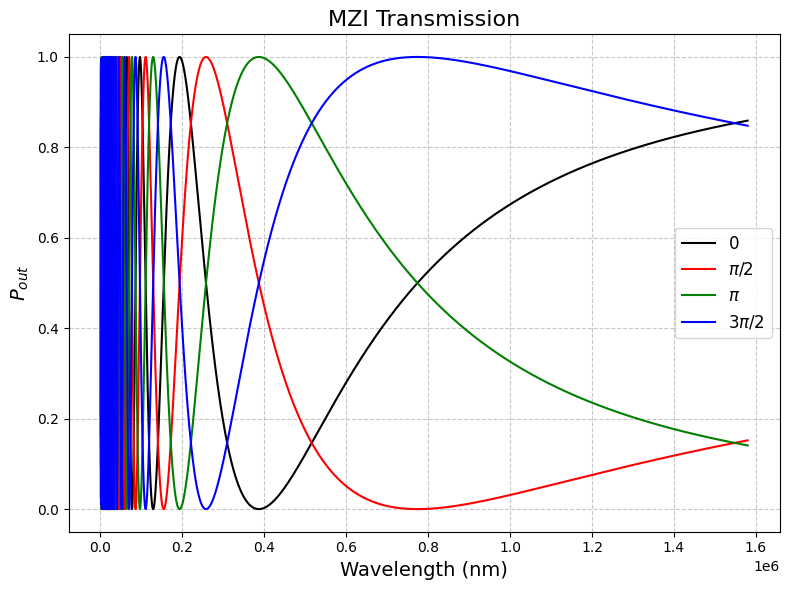

In [4]:
def Pout(Pin, lam, phase):
    len1 = ( 50*3 + 2*(2*np.pi*100)/4 )* 1000
    len2 = ( 50 + 2*(2*np.pi*100)/4 )* 1000
    beta1 = 2*np.pi / lam * neff_air
    beta2 = 2*np.pi / lam * neff_air
    Pin = Pin
    theta = beta1*len1 - beta2*len2 + phase # so this eq is actually kinda wrong bc phase should also have a lambda dependance...
    Pout = Pin*np.cos(theta/2)**2
    return(Pout)

lam = np.linspace(1540, 1580000, 50000)

Pout_0 = Pout(1, lam, 0)
Pout_pi = Pout(1, lam, np.pi)
Pout_pi_2 = Pout(1, lam, np.pi/2)
Pout_3pi_2 = Pout(1, lam, 3*np.pi/2)

plt.figure(figsize=(8, 6))
plt.plot(lam, Pout_0, linestyle='-', color='black', label = '0')
plt.plot(lam, Pout_pi_2, linestyle='-', color='r', label = '$\pi/2$')
plt.plot(lam, Pout_pi, linestyle='-', color='g', label = '$\pi$')
plt.plot(lam, Pout_3pi_2, linestyle='-', color='b', label = '$3\pi/2$')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

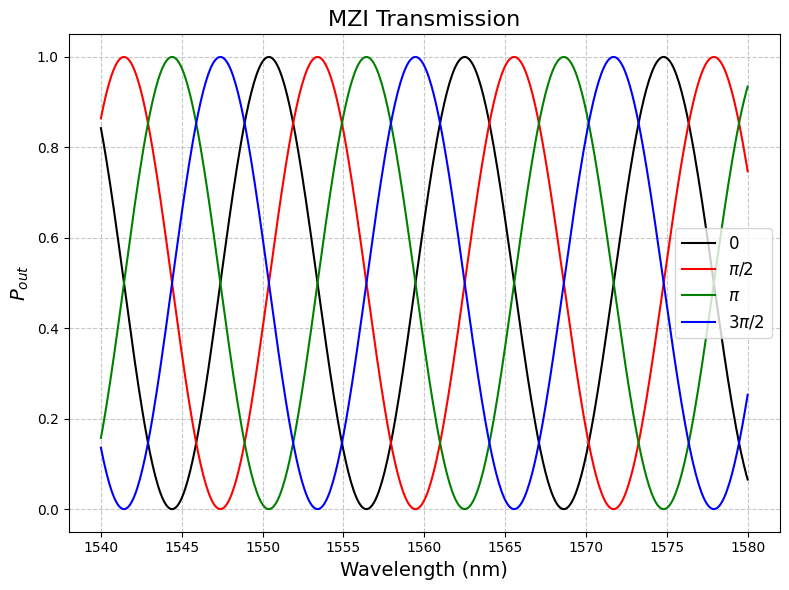

In [5]:
def Pout(Pin, lam, phase):
    len1 = 400 * 1000
    len2 = 300 * 1000
    beta1 = 2*np.pi / lam * 2
    beta2 = 2*np.pi / lam * 2
    Pin = Pin
    theta = beta1*len1 - beta2*len2 + phase # cant actually just add the phase
    Pout = Pin*np.cos(theta/2)**2
    return(Pout)

lam = np.linspace(1540, 1580, 500)

Pout_0 = Pout(1, lam, 0)
Pout_pi = Pout(1, lam, np.pi)
Pout_pi_2 = Pout(1, lam, np.pi/2)
Pout_3pi_2 = Pout(1, lam, 3*np.pi/2)

plt.figure(figsize=(8, 6))
plt.plot(lam, Pout_0, linestyle='-', color='black', label = '0')
plt.plot(lam, Pout_pi_2, linestyle='-', color='r', label = '$\pi/2$')
plt.plot(lam, Pout_pi, linestyle='-', color='g', label = '$\pi$')
plt.plot(lam, Pout_3pi_2, linestyle='-', color='b', label = '$3\pi/2$')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/39/3byfb4ln0nbbfjthv62q1h3m0000gn/T/ipykernel_960/3054521554.py:6: RuntimeWarning: divide by zero encountered in log10
  pl = -10*np.log10(alpha**2) # calculated power loss


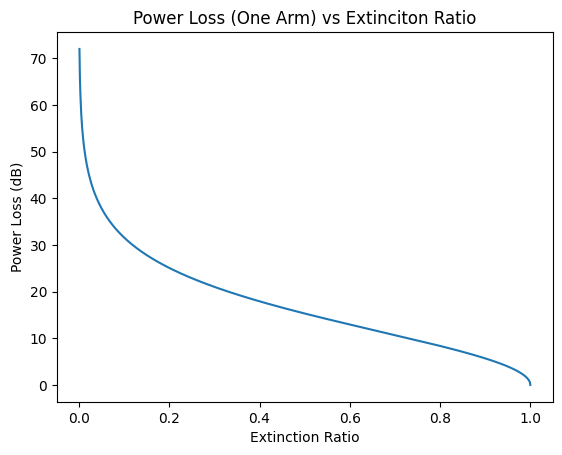

In [6]:
# EXTINCTION RATIO TO POWER LOSS IN DB ###############################################################################

extinction = np.linspace(0,1,1000)

alpha = (1 - np.sqrt(1-extinction)) / ((np.sqrt(1-extinction)+1))
pl = -10*np.log10(alpha**2) # calculated power loss

plt.title("Power Loss (One Arm) vs Extinciton Ratio")
plt.xlabel("Extinction Ratio")
plt.ylabel("Power Loss (dB)")
plt.plot(extinction, pl)

/Users/kamilakunes/BerkeleyLab/PCM_Project/PCM/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/kamilakunes/BerkeleyLab/PCM_Project/PCM/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


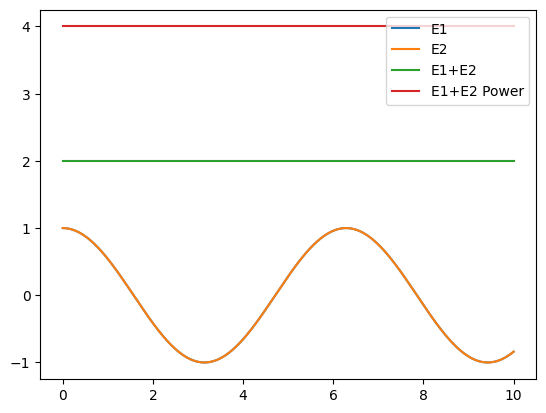

In [7]:
# SOME CODE TO SHOW HOW TWO E FIELDS CAN COMBINE IN A Y SPLITTER COMBINER ############################################

E1_0 = 1
E2_0 = 1
x = np.linspace(0,10,1000)


E1 = E1_0*np.exp(1j*x)
E2 = E2_0*np.exp(1j*x)

sin = np.sin(x)

power = (E1+E2)*(E1+E2).conjugate()

plt.plot(x,E1,label = "E1")
plt.plot(x,E2,label = "E2")
plt.plot(x,abs(E1+E2),label = "E1+E2")
plt.plot(x,power,label = "E1+E2 Power")

plt.legend()

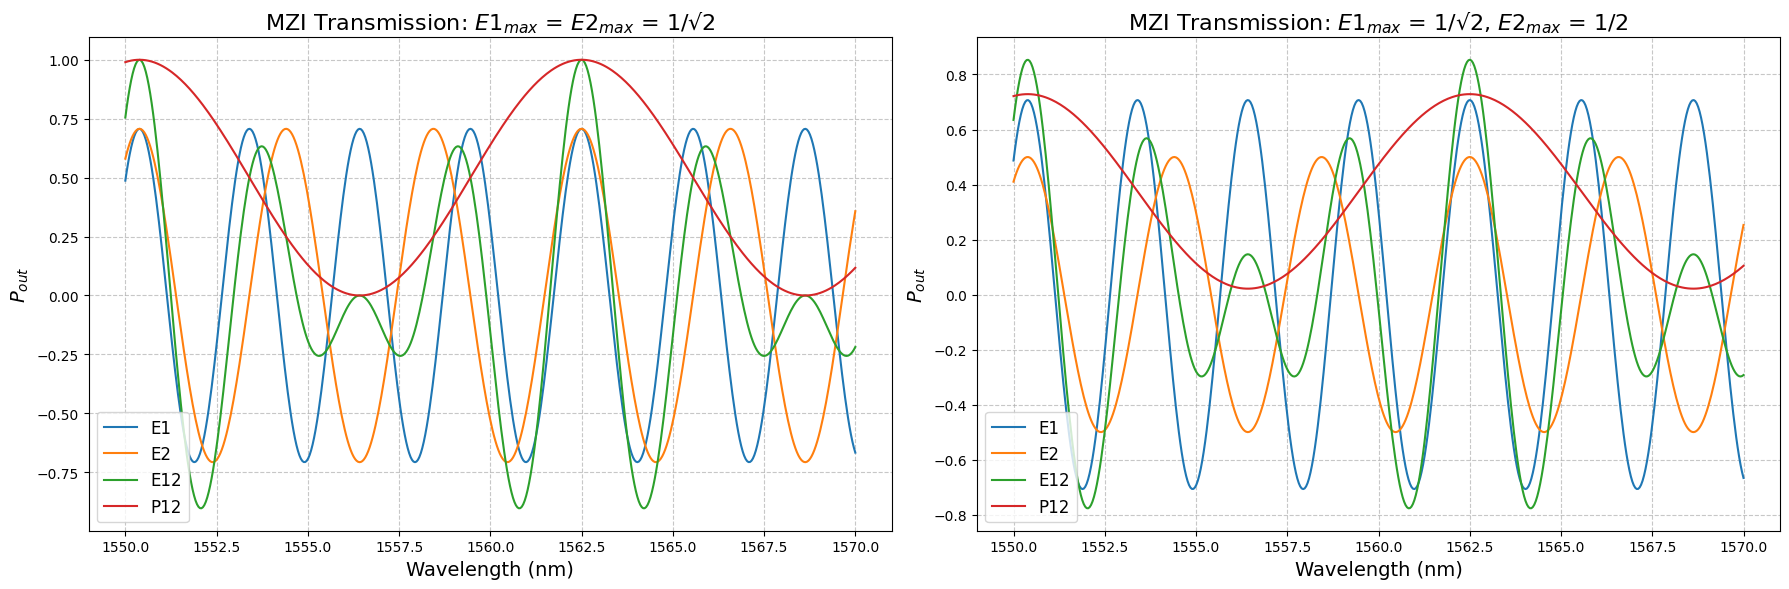

In [8]:
neff = 2
lam = np.linspace(1550, 1570, 500)
beta = 2*np.pi / lam * neff 
len1 = 400 * 1000 # 400 micron or 400,000 nm
len2 = 300 * 1000

E1_0 = 1/np.sqrt(2)
E2_0 = 1/np.sqrt(2)

E1 = E1_0 * np.exp(1j*beta*len1)
E2 = E2_0 * np.exp(1j*beta*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12 = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission: $E1_{max}$ = $E2_{max}$ = 1/\u221A2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()


lam = np.linspace(1550, 1570, 500)
beta = 2*np.pi / lam * 2
len1 = 400 * 1000 # 400 micron or 400,000 nm
len2 = 300 * 1000

E1_0 = 1/np.sqrt(2)
E2_0 = 1/2 #1/np.sqrt(2) # top arm

E1 = E1_0 * np.exp(1j*beta*len1)
E2 = E2_0 * np.exp(1j*beta*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12 = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

# plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 2)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission: $E1_{max}$ = 1/\u221A2, $E2_{max}$ = 1/2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

Extinction ratio: 0.971+0.000j
Power loss in top arm: 3.010-0.000j


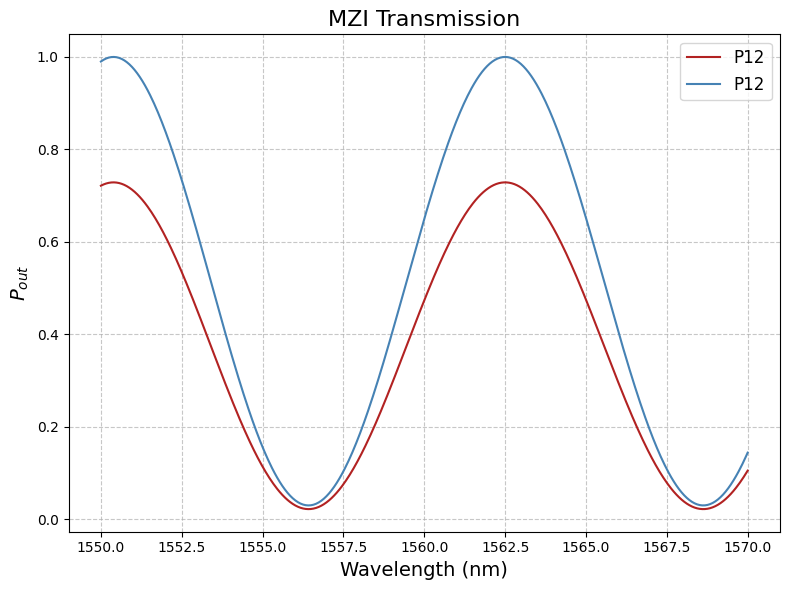

In [9]:



# OTHER FIGURE

P12_norm = P12 / np.max(P12)
ext_ratio = 1 - np.min(P12) / np.max(P12)
print(f"Extinction ratio: {ext_ratio:.3f}")

alpha = (1 - np.sqrt(1-ext_ratio)) / ((np.sqrt(1-ext_ratio)+1))
pl = -10*np.log10(alpha**2)

print(f"Power loss in top arm: {pl:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(lam, P12, linestyle='-', color = "firebrick", label = 'P12')
plt.plot(lam, P12_norm, linestyle='-', color = "steelblue", label = 'P12')
# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$', fontsize=14)
plt.title('MZI Transmission', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/Users/kamilakunes/BerkeleyLab/PCM_Project/PCM/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/kamilakunes/BerkeleyLab/PCM_Project/PCM/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


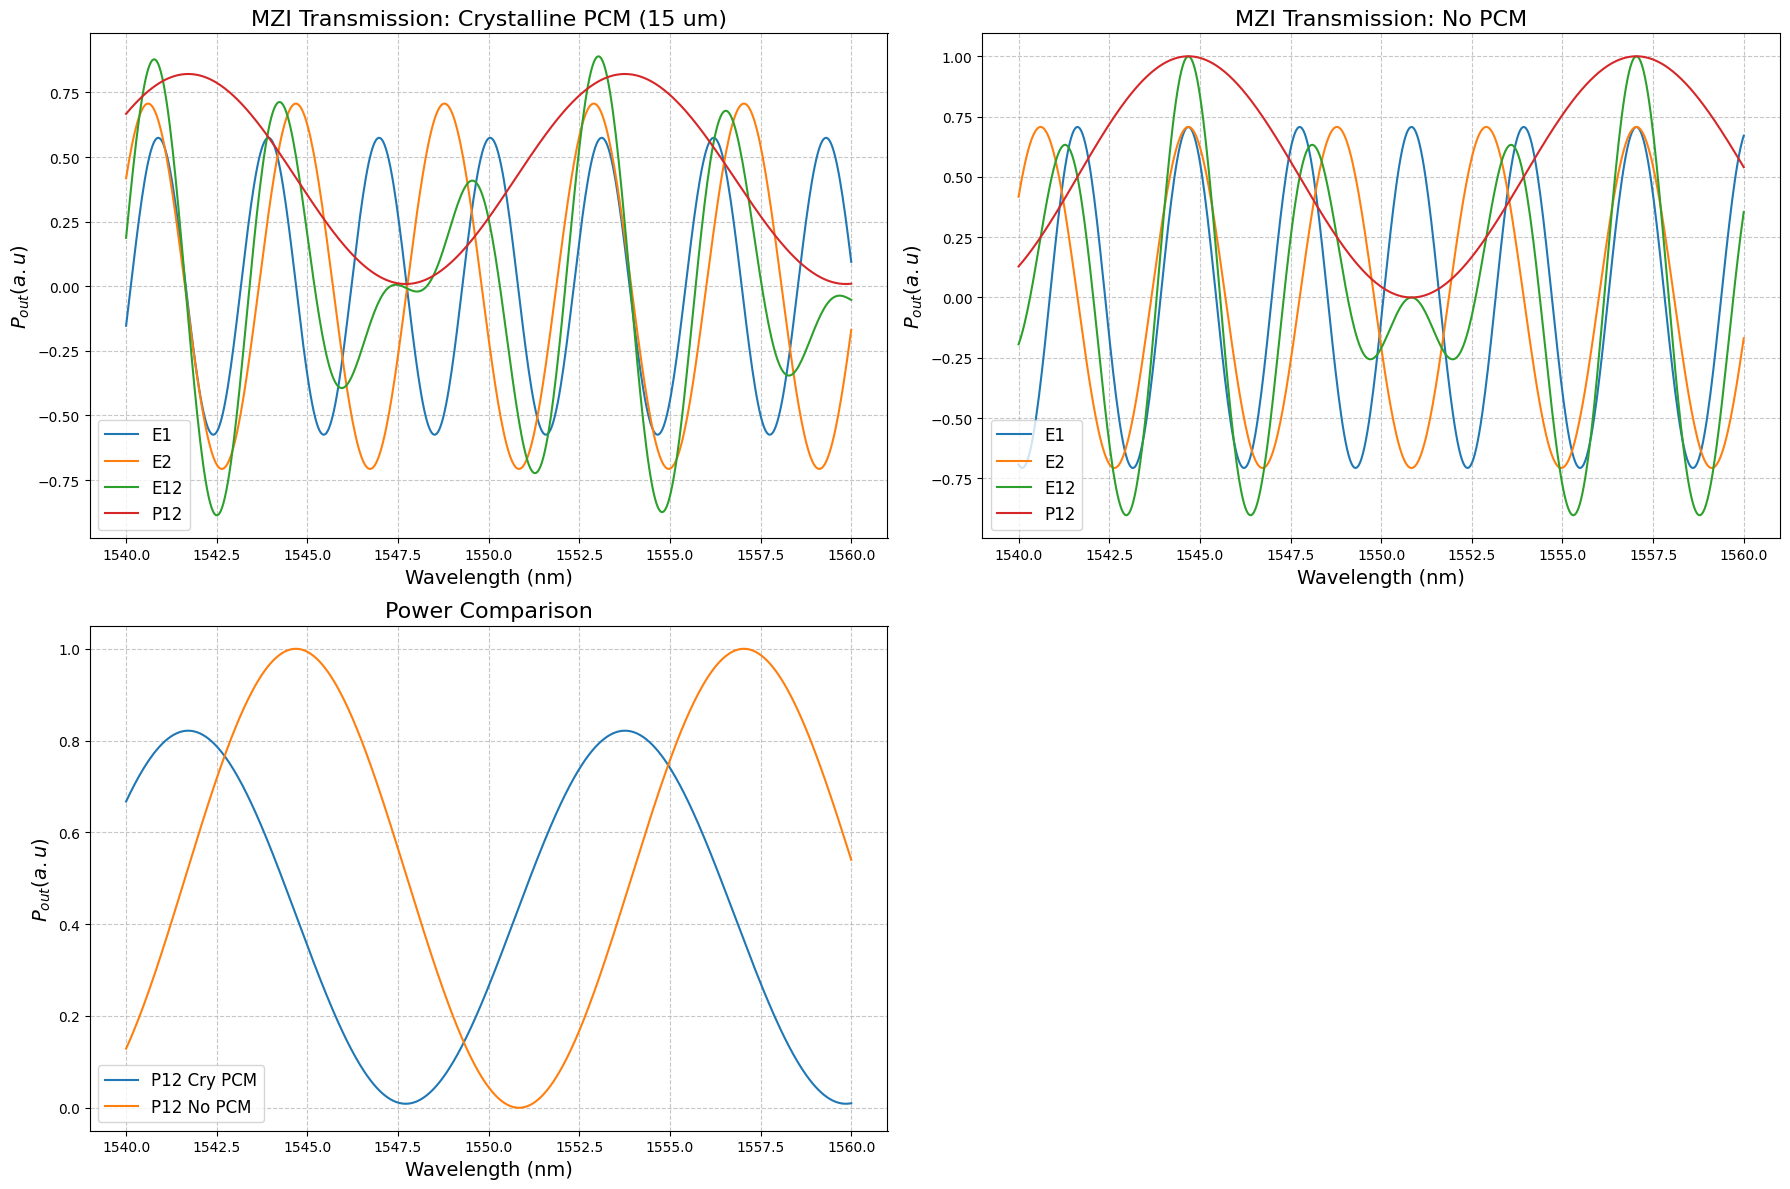

In [21]:
#assuming Ein = 1

neff = 2
nair = 1.9463
ncry = 2.2297

alphaE_cry = 0.8128

lam = np.linspace(1540, 1560, 500) # nm

betaAir = 2*np.pi / lam * nair
betaCry = 2*np.pi / lam * ncry

len1 = 400 * 1000 # 400 micron or 400,000 nm (top arm)
len2 = 300 * 1000
lenPCM = 15 * 1000 # pi length = 4.330 um

# Assuming 50:50 splitting ratio
E1_0 = 1/np.sqrt(2)
E2_0 = 1/np.sqrt(2)

E1 = E1_0 * alphaE_cry * np.exp(1j*(betaAir*(len1-lenPCM)+betaCry*lenPCM))
E2 = E2_0 * np.exp(1j*betaAir*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12p = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12p, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out} (a.u)$', fontsize=14)
plt.title('MZI Transmission: Crystalline PCM (15 um)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()


lam = np.linspace(1540, 1560, 500)
beta = 2*np.pi / lam * 2
len1 = 400 * 1000 # 400 micron or 400,000 nm
len2 = 300 * 1000

E1_0 = 1/np.sqrt(2)
E2_0 = 1/np.sqrt(2) #1/np.sqrt(2) # top arm

E1 = E1_0 * np.exp(1j*betaAir*len1)
E2 = E2_0 * np.exp(1j*betaAir*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12n = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

# plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 2)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12n, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out} (a.u)$', fontsize=14)
plt.title('MZI Transmission: No PCM', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
# plt.plot(lam, E1, linestyle='-', label = 'E1')
# plt.plot(lam, E2, linestyle='-', label = 'E2')
# plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12p, linestyle='-', label = 'P12 Cry PCM')
plt.plot(lam, P12n, linestyle='-', label = 'P12 No PCM')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out} (a.u)$', fontsize=14)
plt.title('Power Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

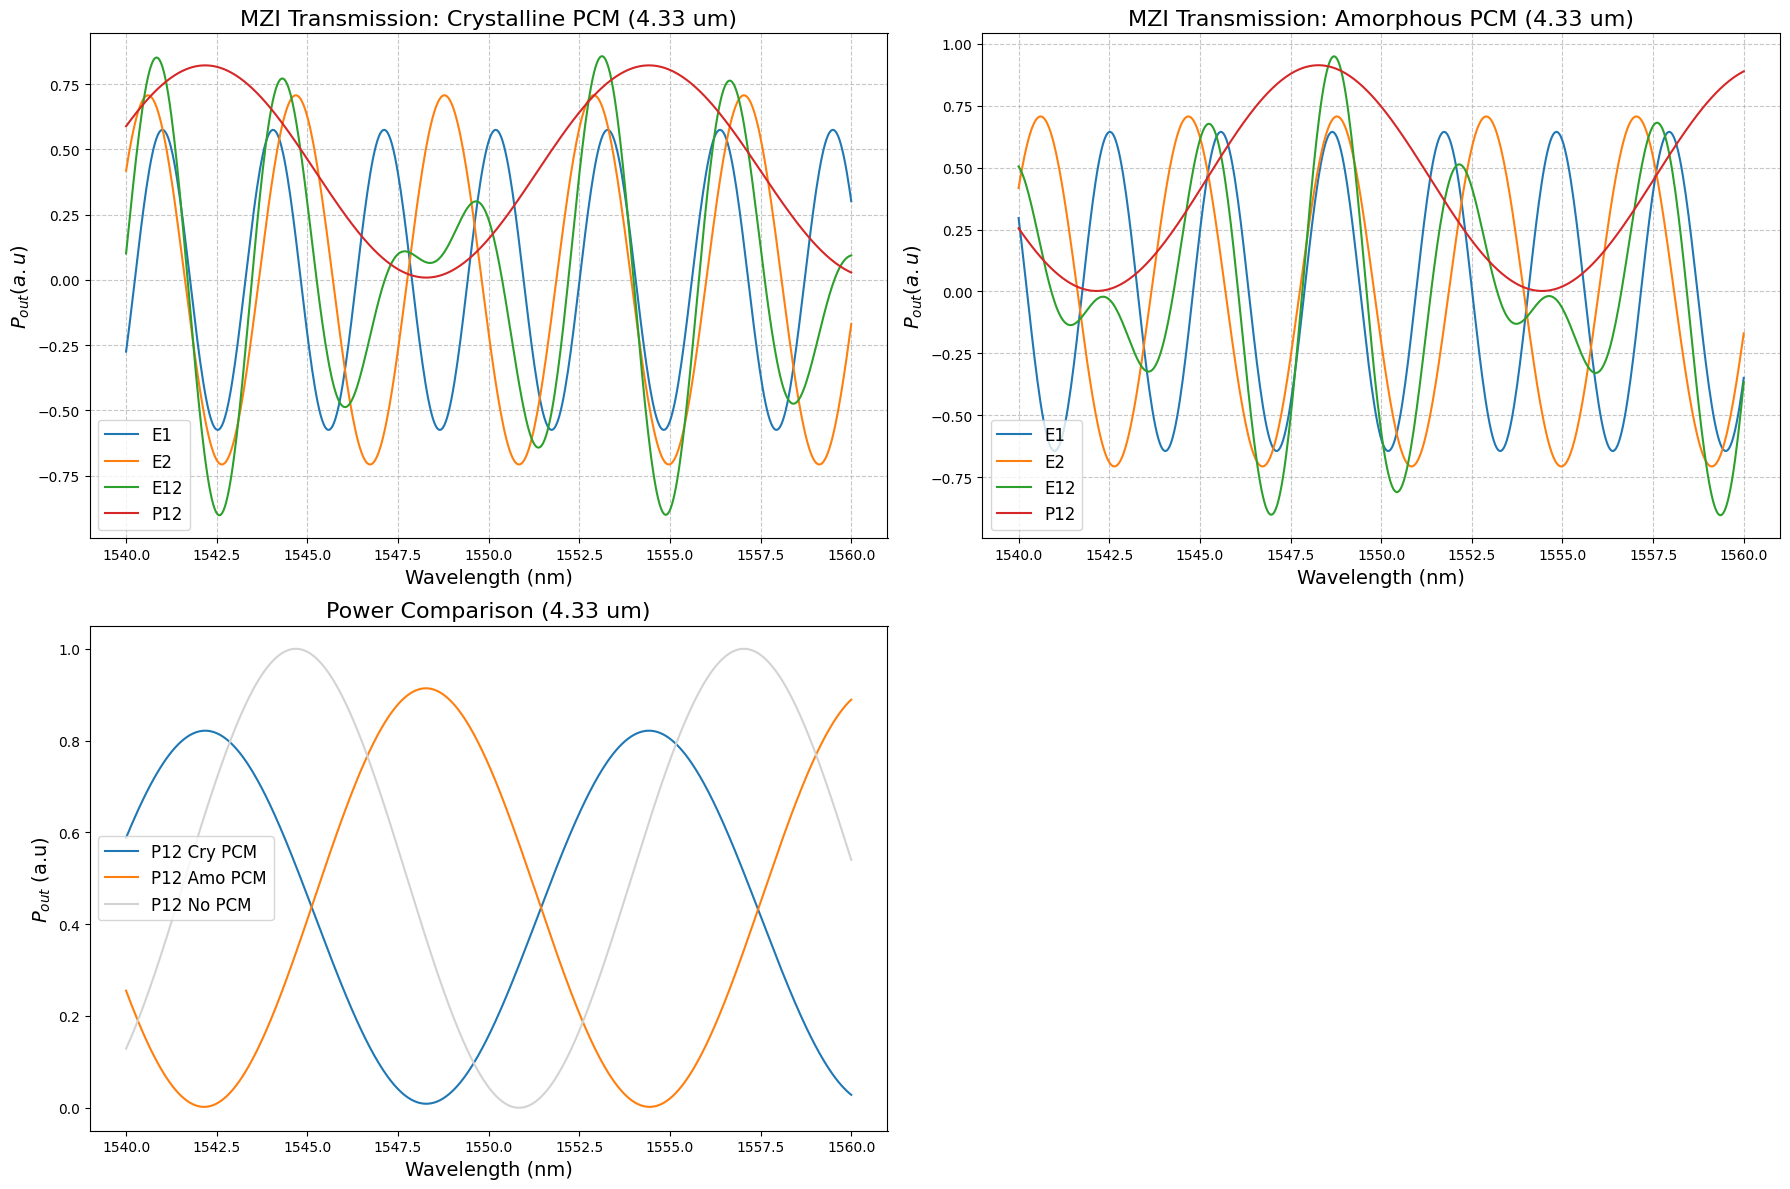

In [25]:
#assuming Ein = 1

neff = 2
nair = 1.9463
ncry = 2.2297
namo = 2.0507


alphaE_cry = 0.8128
alphaE_amo = 0.9120

lam = np.linspace(1540, 1560, 500) # nm

betaAir = 2*np.pi / lam * nair
betaCry = 2*np.pi / lam * ncry
betaAmo = 2*np.pi / lam * namo

len1 = 400 * 1000 # 400 micron or 400,000 nm (top arm)
len2 = 300 * 1000
lenPCM = 4.33 * 1000 # pi length = 4.330 um

# Assuming 50:50 splitting ratio
E1_0 = 1/np.sqrt(2)
E2_0 = 1/np.sqrt(2)

E1 = E1_0 * alphaE_cry * np.exp(1j*(betaAir*(len1-lenPCM)+betaCry*lenPCM))
E2 = E2_0 * np.exp(1j*betaAir*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12p = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12p, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out} (a.u)$', fontsize=14)
plt.title('MZI Transmission: Crystalline PCM (4.33 um)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()


lam = np.linspace(1540, 1560, 500)
beta = 2*np.pi / lam * 2
len1 = 400 * 1000 # 400 micron or 400,000 nm
len2 = 300 * 1000

E1_0 = 1/np.sqrt(2)
E2_0 = 1/np.sqrt(2) #1/np.sqrt(2) # top arm

E1 = E1_0 * alphaE_amo * np.exp(1j*(betaAir*(len1-lenPCM)+betaAmo*lenPCM))
E2 = E2_0 * np.exp(1j*betaAir*len2)

E12 = 1/(np.sqrt(2))*(E1+E2) 
P12 = E12 * E12.conjugate()

Pout_0 = Pout(1, lam, 0)

# plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 2)
plt.plot(lam, E1, linestyle='-', label = 'E1')
plt.plot(lam, E2, linestyle='-', label = 'E2')
plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12, linestyle='-', label = 'P12')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out} (a.u)$', fontsize=14)
plt.title('MZI Transmission: Amorphous PCM (4.33 um)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
# plt.plot(lam, E1, linestyle='-', label = 'E1')
# plt.plot(lam, E2, linestyle='-', label = 'E2')
# plt.plot(lam, E12, linestyle='-', label = 'E12')
plt.plot(lam, P12p, linestyle='-', label = 'P12 Cry PCM')
plt.plot(lam, P12, linestyle='-', label = 'P12 Amo PCM')
plt.plot(lam, P12n, linestyle='-', label = 'P12 No PCM', color = 'lightgrey')

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('$P_{out}$ (a.u)', fontsize=14)
plt.title('Power Comparison (4.33 um)', fontsize=16)
plt.legend(fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()